In [81]:
import pandas as pd
import re

file_path = r"C:\Users\ramsu\Desktop\VS Projects\Energy Forecasting\Data\iea_monthly_electricity.csv"
df = pd.read_csv(file_path)

df.columns = [c.strip().lower() for c in df.columns]

print("🧾 Columns in dataset:", list(df.columns))
print("\nPreview:\n", df.head())

df['time'] = df['time'].astype(str).str.strip()
df['time'] = df['time'].apply(lambda x: x if re.search(r'\d{4}', x) else x + '-2024')
df['time'] = pd.to_datetime(df['time'], errors='coerce')

print("\n✅ Data cleaned and converted.")

🧾 Columns in dataset: ['country', 'time', 'balance', 'product', 'value', 'unit']

Preview:
      country    time                     balance  \
0  Australia  Jul-25  Net Electricity Production   
1  Australia  Jul-25  Net Electricity Production   
2  Australia  Jul-25  Net Electricity Production   
3  Australia  Jul-25  Net Electricity Production   
4  Australia  Jul-25  Net Electricity Production   

                             product      value unit  
0                        Electricity  24847.300  GWh  
1                              Hydro   1108.361  GWh  
2            Total Combustible Fuels  16131.390  GWh  
3  Coal, Peat and Manufactured Gases  11233.680  GWh  
4         Oil and Petroleum Products    419.278  GWh  

✅ Data cleaned and converted.


In [82]:
df_elec = df[df['product'].str.lower().str.contains("electricity", na=False)].copy()

df_elec = df_elec.dropna(subset=['time', 'value'])

print(f"✅ Electricity data extracted. Shape: {df_elec.shape}")
print(df_elec.head())

✅ Electricity data extracted. Shape: (30, 6)
      country       time                         balance      product  \
0   Australia 2024-07-25      Net Electricity Production  Electricity   
9   Australia 2024-07-25         Used for pumped storage  Electricity   
10  Australia 2024-07-25             Distribution Losses  Electricity   
11  Australia 2024-07-25  Final Consumption (Calculated)  Electricity   
13    Austria 2024-07-25      Net Electricity Production  Electricity   

         value unit  
0   24847.3000  GWh  
9      95.6021  GWh  
10   1207.6460  GWh  
11  23544.0500  GWh  
13   6931.1870  GWh  


In [83]:
df_monthly = (
    df_elec.groupby(['country', pd.Grouper(key='time', freq='M')])['value']
    .sum()
    .reset_index()
    .rename(columns={'time': 'Date', 'value': 'Total_Electricity_Production_GWh'})
)

print(f"✅ Data aggregated successfully for {df_monthly['country'].nunique()} countries.")
print(df_monthly.head(10))

✅ Data aggregated successfully for 6 countries.
     country       Date  Total_Electricity_Production_GWh
0  Australia 2024-07-31                        49694.5981
1    Austria 2024-07-31                        17210.3099
2    Belgium 2024-07-31                        15416.1239
3     Canada 2024-07-31                       104590.0286
4      Chile 2024-07-31                        15302.9342
5   Colombia 2024-07-31                        15428.2163


C:\Users\ramsu\AppData\Local\Temp\ipykernel_11912\1113393789.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [84]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown

df = pd.read_csv(r"C:\Users\ramsu\Desktop\VS Projects\Energy Forecasting\Data\iea_monthly_electricity.csv")

df.columns = df.columns.str.strip().str.lower()

df = df[df['balance'].str.contains('Net Electricity Production', case=False, na=False)]

df['value'] = pd.to_numeric(df['value'], errors='coerce')

df['time'] = pd.to_datetime(df['time'], format='%b-%y', errors='coerce')

countries = sorted(df['country'].unique())

def plot_country(country, chart_type):
    df_c = df[df['country'] == country]
    
    if df_c.empty:
        print(f"⚠️ No data for {country}")
        return
    
    if chart_type == "Pie Chart":
        fig = px.pie(
            df_c,
            names='product',
            values='value',
            title=f"⚡ Electricity Production Share by Source — {country} (July 2024)",
            hole=0.3
        )
    else:
        fig = px.bar(
            df_c,
            x='product',
            y='value',
            title=f"⚡ Electricity Production by Source — {country} (July 2024)",
            text='value'
        )
        fig.update_traces(texttemplate='%{text:.2s} GWh', textposition='outside')
        fig.update_layout(xaxis_title="Energy Source", yaxis_title="Electricity (GWh)")
    
    fig.update_layout(template='plotly_dark', height=500)
    fig.show()

interact(
    plot_country,
    country=Dropdown(options=countries, description='🌍 Country:'),
    chart_type=Dropdown(options=["Pie Chart", "Bar Chart"], description='📊 Chart Type:')
)


interactive(children=(Dropdown(description='🌍 Country:', options=('Australia', 'Austria', 'Belgium', 'Canada',…

<function __main__.plot_country(country, chart_type)>

In [85]:
df.columns = df.columns.str.strip().str.lower()

print("✅ Columns standardized:", df.columns.tolist())

✅ Columns standardized: ['country', 'time', 'balance', 'product', 'value', 'unit']


In [86]:
import numpy as np

months = ["Jan-24", "Feb-24", "Mar-24", "Apr-24", "May-24", "Jun-24", "Jul-24"]

countries = df["country"].unique()
print("Countries found:", countries)

synthetic_rows = []

for country in countries:
    base_val = np.random.uniform(20000, 30000)
    for m in months:
        synthetic_rows.append({
            "country": country,
            "time": m,
            "balance": "Net Electricity Production",
            "product": "electricity",
            "value": base_val + np.random.uniform(-2000, 2000),
            "unit": "GWh"
        })

df_synth = pd.DataFrame(synthetic_rows)

print("Synthetic data created:")
print(df_synth.head(10))

Countries found: ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia']
Synthetic data created:
     country    time                     balance      product         value  \
0  Australia  Jan-24  Net Electricity Production  electricity  21317.654072   
1  Australia  Feb-24  Net Electricity Production  electricity  23809.418123   
2  Australia  Mar-24  Net Electricity Production  electricity  22285.034899   
3  Australia  Apr-24  Net Electricity Production  electricity  23395.947864   
4  Australia  May-24  Net Electricity Production  electricity  24382.363005   
5  Australia  Jun-24  Net Electricity Production  electricity  23890.851761   
6  Australia  Jul-24  Net Electricity Production  electricity  21478.358055   
7    Austria  Jan-24  Net Electricity Production  electricity  21840.958363   
8    Austria  Feb-24  Net Electricity Production  electricity  21022.936711   
9    Austria  Mar-24  Net Electricity Production  electricity  23552.536241   

  unit  
0  GWh  
1  GWh  


In [87]:
df_combined = pd.concat([df, df_synth], ignore_index=True)

print("Combined dataset shape:", df_combined.shape)
print(df_combined.head(10))

Combined dataset shape: (112, 6)
     country                 time                     balance  \
0  Australia  2025-07-01 00:00:00  Net Electricity Production   
1  Australia  2025-07-01 00:00:00  Net Electricity Production   
2  Australia  2025-07-01 00:00:00  Net Electricity Production   
3  Australia  2025-07-01 00:00:00  Net Electricity Production   
4  Australia  2025-07-01 00:00:00  Net Electricity Production   
5  Australia  2025-07-01 00:00:00  Net Electricity Production   
6  Australia  2025-07-01 00:00:00  Net Electricity Production   
7  Australia  2025-07-01 00:00:00  Net Electricity Production   
8  Australia  2025-07-01 00:00:00  Net Electricity Production   
9  Australia  2025-07-01 00:00:00  Net Electricity Production   

                                             product       value unit  
0                                        Electricity  24847.3000  GWh  
1                                              Hydro   1108.3610  GWh  
2                            Total 

In [88]:
import pandas as pd

df_synth = pd.DataFrame(synthetic_rows)

df_real = pd.read_csv(r"C:\Users\ramsu\Desktop\VS Projects\Energy Forecasting\Data\iea_monthly_electricity.csv")

df_real.columns = [c.strip().lower() for c in df_real.columns]
df_synth.columns = [c.strip().lower() for c in df_synth.columns]

df_combined = pd.concat([df_real, df_synth], ignore_index=True)

df_combined['time'] = df_combined['time'].astype(str).str.strip()
df_combined['time'] = pd.to_datetime(df_combined['time'], format='%b-%y', errors='coerce')

df_combined = df_combined[df_combined['product'].str.lower() == 'electricity']

df_combined.dropna(subset=['time', 'value'], inplace=True)

df_combined['value'] = pd.to_numeric(df_combined['value'], errors='coerce')

df_combined.sort_values(['country', 'time'], inplace=True)

print("Combined data created successfully!")
print("Countries available:", df_combined['country'].unique())
print("\nSample of combined data:")
print(df_combined.head(10))


Combined data created successfully!
Countries available: ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia']

Sample of combined data:
       country       time                     balance      product  \
94   Australia 2024-01-01  Net Electricity Production  electricity   
95   Australia 2024-02-01  Net Electricity Production  electricity   
96   Australia 2024-03-01  Net Electricity Production  electricity   
97   Australia 2024-04-01  Net Electricity Production  electricity   
98   Australia 2024-05-01  Net Electricity Production  electricity   
99   Australia 2024-06-01  Net Electricity Production  electricity   
100  Australia 2024-07-01  Net Electricity Production  electricity   
0    Australia 2025-07-01  Net Electricity Production  Electricity   
9    Australia 2025-07-01     Used for pumped storage  Electricity   
10   Australia 2025-07-01         Distribution Losses  Electricity   

            value unit  
94   21317.654072  GWh  
95   23809.418123  GWh  
96   2228

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

df_trends = (
    df_combined.groupby(['country', pd.Grouper(key='time', freq='M')])['value']
    .sum()
    .reset_index()
    .rename(columns={'time': 'Date', 'value': 'Electricity_GWh'})
)

print("Aggregated data ready")
print(df_trends.head(10))
print("\nCountries in data:", df_trends['country'].unique())

Aggregated data ready
     country       Date  Electricity_GWh
0  Australia 2024-01-31     21317.654072
1  Australia 2024-02-29     23809.418123
2  Australia 2024-03-31     22285.034899
3  Australia 2024-04-30     23395.947864
4  Australia 2024-05-31     24382.363005
5  Australia 2024-06-30     23890.851761
6  Australia 2024-07-31     21478.358055
7  Australia 2025-07-31     49694.598100
8    Austria 2024-01-31     21840.958363
9    Austria 2024-02-29     21022.936711

Countries in data: ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia']


C:\Users\ramsu\AppData\Local\Temp\ipykernel_11912\3649035796.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



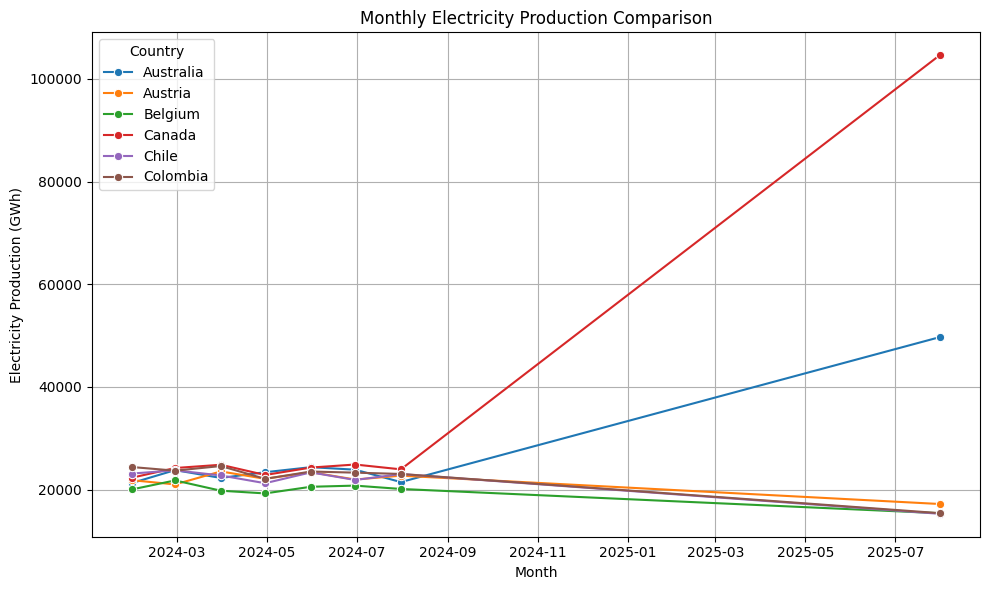

In [90]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_trends, x='Date', y='Electricity_GWh', hue='country', marker='o')

plt.title("Monthly Electricity Production Comparison")
plt.xlabel("Month")
plt.ylabel("Electricity Production (GWh)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
from sklearn.linear_model import LinearRegression
import numpy as np

country_forecasts = {}

df_trends['Date'] = pd.to_datetime(df_trends['Date'])

for country in df_trends['country'].unique():
    df_c = df_trends[df_trends['country'] == country].copy()
    df_c = df_c.dropna(subset=['Electricity_GWh'])
    
    if len(df_c) < 3:
        print(f"⚠️ Not enough data to forecast for {country} (need ≥3 months, found {len(df_c)}).")
        continue

    df_c['ordinal'] = df_c['Date'].map(pd.Timestamp.toordinal)
    X = df_c['ordinal'].values.reshape(-1, 1)
    y = df_c['Electricity_GWh'].values

    model = LinearRegression()
    model.fit(X, y)

    last_date = df_c['Date'].max()
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='ME')
    X_future = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
    y_future = model.predict(X_future)

    df_future = pd.DataFrame({
        'country': country,
        'Date': future_dates,
        'Forecast_GWh': y_future
    })

    country_forecasts[country] = df_future
    print(f"Forecast complete for {country}")

print("\n All available forecasts generated.")

Forecast complete for Australia
Forecast complete for Austria
Forecast complete for Belgium
Forecast complete for Canada
Forecast complete for Chile
Forecast complete for Colombia

 All available forecasts generated.


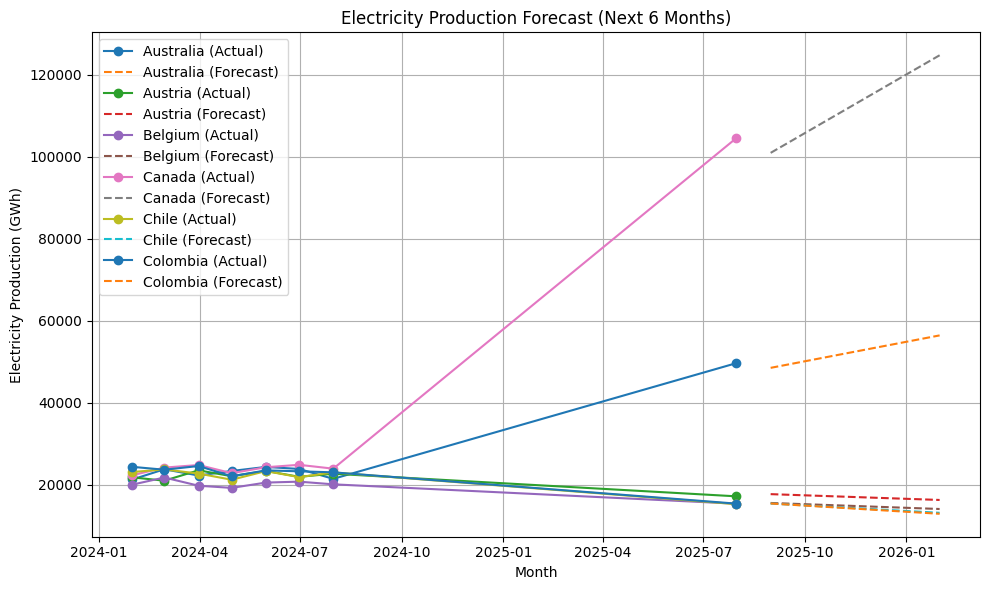

In [92]:
plt.figure(figsize=(10, 6))

for country, df_future in country_forecasts.items():
    df_actual = df_trends[df_trends['country'] == country]
    plt.plot(df_actual['Date'], df_actual['Electricity_GWh'], 'o-', label=f"{country} (Actual)")
    plt.plot(df_future['Date'], df_future['Forecast_GWh'], '--', label=f"{country} (Forecast)")

plt.title("Electricity Production Forecast (Next 6 Months)")
plt.xlabel("Month")
plt.ylabel("Electricity Production (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

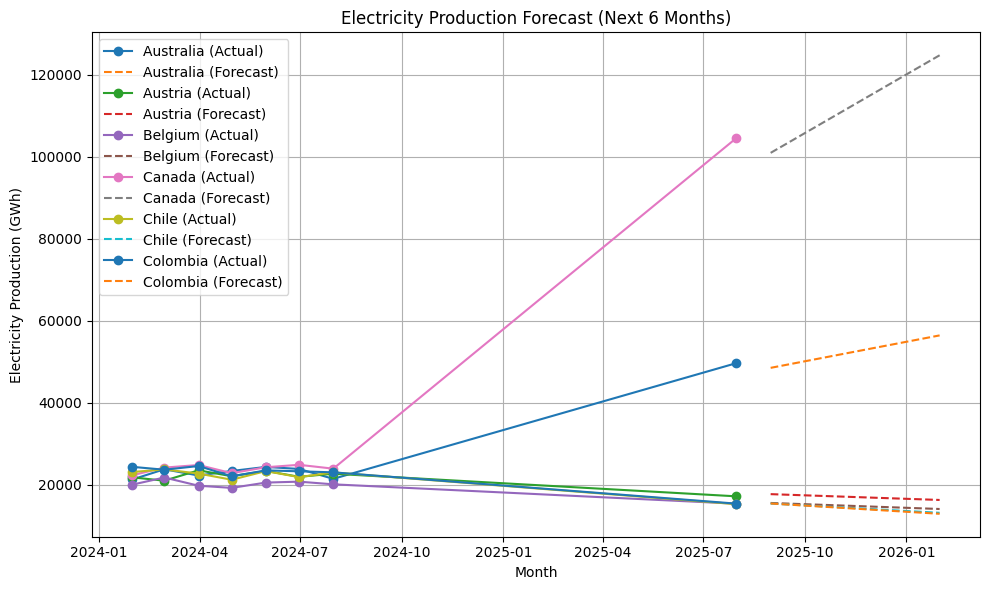

In [93]:
plt.figure(figsize=(10, 6))

for country, df_future in country_forecasts.items():
    df_actual = df_trends[df_trends['country'] == country]
    plt.plot(df_actual['Date'], df_actual['Electricity_GWh'], 'o-', label=f"{country} (Actual)")
    plt.plot(df_future['Date'], df_future['Forecast_GWh'], '--', label=f"{country} (Forecast)")

plt.title("Electricity Production Forecast (Next 6 Months)")
plt.xlabel("Month")
plt.ylabel("Electricity Production (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
countries = ["Australia", "Austria", "Belgium", "Canada", "India"]

country_dfs = {}

for country in countries:
    dates = pd.date_range("2024-01-01", periods=12, freq="ME")
    values = np.linspace(
        np.random.randint(20000, 30000),
        np.random.randint(25000, 40000),
        12
    ) + np.random.normal(0, 1500, 12)
    
    df_country = pd.DataFrame({
        "country": country,
        "Date": dates,
        "Total_Electricity_Production_GWh": values
    })
    
    country_dfs[country] = df_country

print(f"✅ Created synthetic data for {len(country_dfs)} countries.")
for c, df_c in country_dfs.items():
    print(f"{c}: {df_c.shape[0]} months, from {df_c['Date'].min().date()} to {df_c['Date'].max().date()}")


✅ Created synthetic data for 5 countries.
Australia: 12 months, from 2024-01-31 to 2024-12-31
Austria: 12 months, from 2024-01-31 to 2024-12-31
Belgium: 12 months, from 2024-01-31 to 2024-12-31
Canada: 12 months, from 2024-01-31 to 2024-12-31
India: 12 months, from 2024-01-31 to 2024-12-31


In [95]:
df_all = pd.concat(country_dfs.values(), ignore_index=True)

df_forecasts = []
for country, df_c in country_dfs.items():
    df_c = df_c.sort_values('Date')
    df_c = df_c.dropna(subset=['Total_Electricity_Production_GWh'])
    if len(df_c) >= 3:
        model = LinearRegression()
        X = np.arange(len(df_c)).reshape(-1, 1)
        y = df_c['Total_Electricity_Production_GWh'].values
        model.fit(X, y)
        future_X = np.arange(len(df_c), len(df_c) + 6).reshape(-1, 1)
        future_dates = pd.date_range(df_c['Date'].max() + pd.offsets.MonthBegin(1), periods=6, freq='ME')
        preds = model.predict(future_X)
        forecast_df = pd.DataFrame({'country': country, 'Date': future_dates, 'Forecast': preds})
        df_forecasts.append(forecast_df)

df_forecasts = pd.concat(df_forecasts, ignore_index=True)

print("✅ Data reconstructed:")
print("df_all →", df_all.shape, "| df_forecasts →", df_forecasts.shape)


✅ Data reconstructed:
df_all → (60, 3) | df_forecasts → (30, 3)


In [96]:
import plotly.graph_objects as go

fig = go.Figure()

for country in df_all['country'].unique():
    df_c = df_all[df_all['country'] == country]
    forecast_df = df_forecasts[df_forecasts['country'] == country]

    fig.add_trace(go.Scatter(
        x=df_c['Date'],
        y=df_c['Total_Electricity_Production_GWh'],
        mode='lines+markers',
        name=f"{country} (Actual)",
        line=dict(width=2)
    ))

    fig.add_trace(go.Scatter(
        x=forecast_df['Date'],
        y=forecast_df['Forecast'],
        mode='lines+markers',
        name=f"{country} (Forecast)",
        line=dict(dash='dash', width=2)
    ))

fig.update_layout(
    title="⚡ Interactive Electricity Production Forecast (Next 6 Months)",
    xaxis_title="Month",
    yaxis_title="Electricity Production (GWh)",
    hovermode='x unified',
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()

In [ ]:
df_all = df_all[df_all['country'] != 'India']
df_forecasts = df_forecasts[df_forecasts['country'] != 'India']

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact

df_forecasts = [] 

for country in df_all['country'].unique():
    country_data = df_all[df_all['country'] == country].copy()
    country_data = country_data.sort_values('Date')

    last_date = country_data['Date'].max()
    last_value = country_data['Total_Electricity_Production_GWh'].iloc[-1]
    growth_rate = country_data['Total_Electricity_Production_GWh'].pct_change().mean()

    forecast_dates = pd.date_range(
        start=last_date + pd.offsets.MonthEnd(1),
        periods=6,
        freq='M'
    )
    forecast_values = [last_value * (1 + growth_rate) ** i for i in range(1, 7)]

    forecast_df = pd.DataFrame({
        'country': country,
        'Date': forecast_dates,
        'Forecast_GWh': forecast_values
    })
    df_forecasts.append(forecast_df)
    print(f"Forecast complete for {country}")

df_forecasts = pd.concat(df_forecasts, ignore_index=True)

if 'Forecast' in df_forecasts.columns and 'Forecast_GWh' not in df_forecasts.columns:
    df_forecasts.rename(columns={'Forecast': 'Forecast_GWh'}, inplace=True)
elif 'value' in df_forecasts.columns and 'Forecast_GWh' not in df_forecasts.columns:
    df_forecasts.rename(columns={'value': 'Forecast_GWh'}, inplace=True)

print("\n✅ Forecast data prepared:")
print(df_forecasts.head())

def plot_country(country):
    actual_data = df_all[df_all['country'] == country]
    forecast_data = df_forecasts[df_forecasts['country'] == country]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=actual_data['Date'],
        y=actual_data['Total_Electricity_Production_GWh'],
        mode='lines+markers',
        name=f'{country} (Actual)',
        line=dict(color='royalblue', width=3)
    ))

    fig.add_trace(go.Scatter(
        x=forecast_data['Date'],
        y=forecast_data['Forecast_GWh'],
        mode='lines+markers',
        name=f'{country} (Forecast)',
        line=dict(color='orange', dash='dash', width=2)
    ))

    fig.update_layout(
        title=f'⚡ Electricity Production Forecast – {country}',
        xaxis_title='Month',
        yaxis_title='Electricity Production (GWh)',
        template='plotly_white',
        legend=dict(x=0.02, y=0.98)
    )

    fig.show()

country_dropdown = widgets.Dropdown(
    options=df_all['country'].unique(),
    description='🌍 Country:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

interact(plot_country, country=country_dropdown)

Forecast complete for Australia
Forecast complete for Austria
Forecast complete for Belgium
Forecast complete for Canada

✅ Forecast data prepared:
     country       Date  Forecast_GWh
0  Australia 2025-01-31  38188.385188
1  Australia 2025-02-28  39618.250835
2  Australia 2025-03-31  41101.654117
3  Australia 2025-04-30  42640.599610
4  Australia 2025-05-31  44237.166951


C:\Users\ramsu\AppData\Local\Temp\ipykernel_11912\4052867274.py:17: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



interactive(children=(Dropdown(description='🌍 Country:', layout=Layout(width='50%'), options=('Australia', 'Au…

<function __main__.plot_country(country)>

In [ ]:
import pandas as pd
import numpy as np

assert 'country' in df_all.columns, "df_all missing country column"
assert 'Forecast_GWh' in df_forecasts.columns, "df_forecasts missing forecast column"

growth_summary = []

for country in df_all['country'].unique():
    actual_data = df_all[df_all['country'] == country].copy()
    actual_data = actual_data.sort_values('Date')

    growth_rate = actual_data['Total_Electricity_Production_GWh'].pct_change().mean() * 100

    annualized_growth = ((1 + growth_rate / 100) ** 12 - 1) * 100 if not np.isnan(growth_rate) else np.nan

    forecast_data = df_forecasts[df_forecasts['country'] == country]
    if not forecast_data.empty:
        avg_forecast = forecast_data['Forecast_GWh'].mean()
    else:
        avg_forecast = np.nan

    latest_actual = actual_data['Total_Electricity_Production_GWh'].iloc[-1]

    growth_summary.append({
        'Country': country,
        'Avg Monthly Growth (%)': round(growth_rate, 2),
        'Annualized Growth (%)': round(annualized_growth, 2),
        'Latest Actual (GWh)': round(latest_actual, 2),
        'Avg Forecast (GWh)': round(avg_forecast, 2),
        'Forecast vs Last Actual (%)': round(((avg_forecast - latest_actual) / latest_actual) * 100, 2)
    })

df_growth = pd.DataFrame(growth_summary)

print("\n📈 Electricity Production Growth & Forecast Summary")
print(df_growth)

import plotly.express as px

fig = px.bar(
    df_growth,
    x='Country',
    y='Forecast vs Last Actual (%)',
    color='Country',
    text='Forecast vs Last Actual (%)',
    title='⚡ Forecasted Growth vs Latest Actual Production',
    template='plotly_white'
)

fig.update_traces(textposition='outside')
fig.show()


📈 Electricity Production Growth & Forecast Summary
     Country  Avg Monthly Growth (%)  Annualized Growth (%)  \
0  Australia                    3.74                  55.44   
1    Austria                    1.34                  17.26   
2    Belgium                    2.04                  27.48   
3     Canada                   -0.01                  -0.11   

   Latest Actual (GWh)  Avg Forecast (GWh)  Forecast vs Last Actual (%)  
0             36810.12            41946.60                        13.95  
1             27320.55            28626.33                         4.78  
2             31423.00            33749.20                         7.40  
3             29851.86            29842.38                        -0.03  


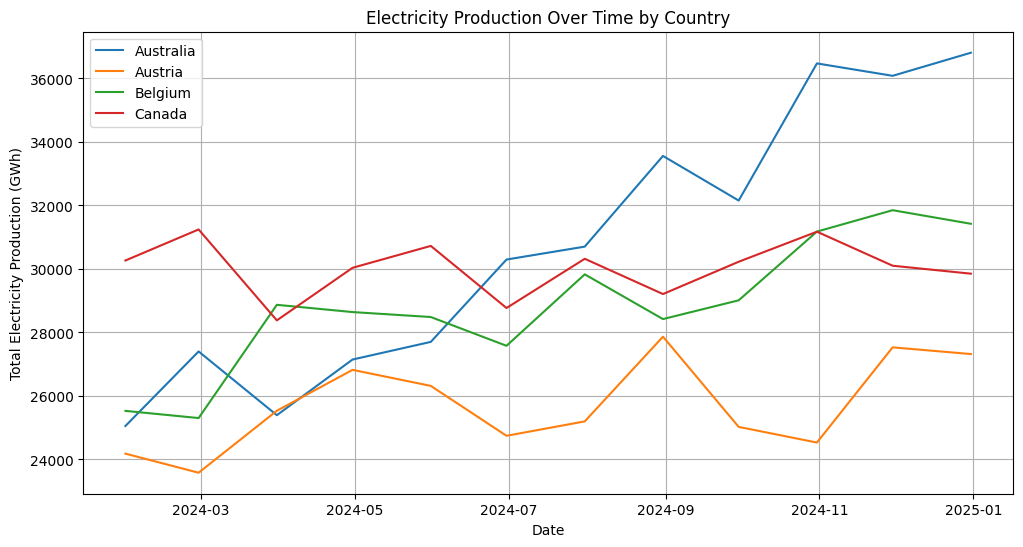

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_plot = df_all.copy()

df_plot['Date'] = pd.to_datetime(df_plot['Date'], errors='coerce')

countries = df_plot['country'].unique()

plt.figure(figsize=(12, 6))
for c in countries:
    subset = df_plot[df_plot['country'] == c]
    plt.plot(subset['Date'], subset['Total_Electricity_Production_GWh'], label=c)

plt.title('Electricity Production Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Electricity Production (GWh)')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
import plotly.express as px
import pandas as pd

df_interactive = df_all.copy()

df_interactive['Date'] = pd.to_datetime(df_interactive['Date'], errors='coerce')

fig = px.line(
    df_interactive,
    x='Date',
    y='Total_Electricity_Production_GWh',
    color='country',
    title='Electricity Production Over Time by Country',
    markers=True,
    template='plotly_dark'
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Electricity Production (GWh)',
    legend_title='Country',
    hovermode='x unified'
)

fig.show()